In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
file_path = r"C:\Users\wasadmin\Desktop\EDP_capstone\mongo\json\combined_output.json"


with open(file_path, 'r') as file:
    data = json.load(file)

In [26]:
np.max(df['rating'])

5.0

brand, name, price ,rating, product_type

add - quantity sold - random 1-
predictor - recommendation col - training/ based off rating and quantity sold

In [13]:
df = pd.DataFrame(data)
df.columns

Index(['id', 'brand', 'name', 'price', 'price_sign', 'currency', 'image_link',
       'product_link', 'website_link', 'description', 'rating', 'category',
       'product_type', 'tag_list', 'created_at', 'updated_at',
       'product_api_url', 'api_featured_image', 'product_colors'],
      dtype='object')

In [15]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (940, 19)

Data types:
id                      int64
brand                  object
name                   object
price                  object
price_sign             object
currency               object
image_link             object
product_link           object
website_link           object
description            object
rating                float64
category               object
product_type           object
tag_list               object
created_at             object
updated_at             object
product_api_url        object
api_featured_image     object
product_colors         object
dtype: object

Missing values per column:
id                      0
brand                  12
name                    0
price                  16
price_sign            562
currency              562
image_link              0
product_link            0
website_link            0
description             2
rating                588
category              372
product_type            0
tag_list    

In [18]:
print(df[['price', 'rating']].describe())

           rating
count  352.000000
mean     4.309659
std      0.686307
min      1.500000
25%      4.000000
50%      4.500000
75%      4.900000
max      5.000000


Price distribution chart


In [21]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

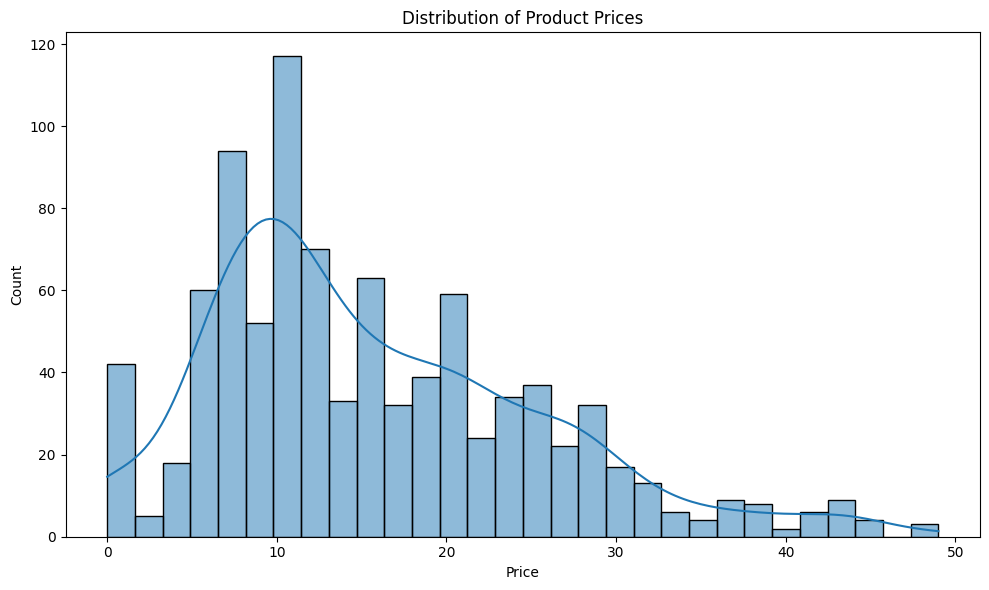

In [23]:
q1 = df['price'].quantile(0.01) 
q3 = df['price'].quantile(0.99)  
filtered_prices = df[(df['price'] >= q1) & (df['price'] <= q3)]['price']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

price by top 10 brands


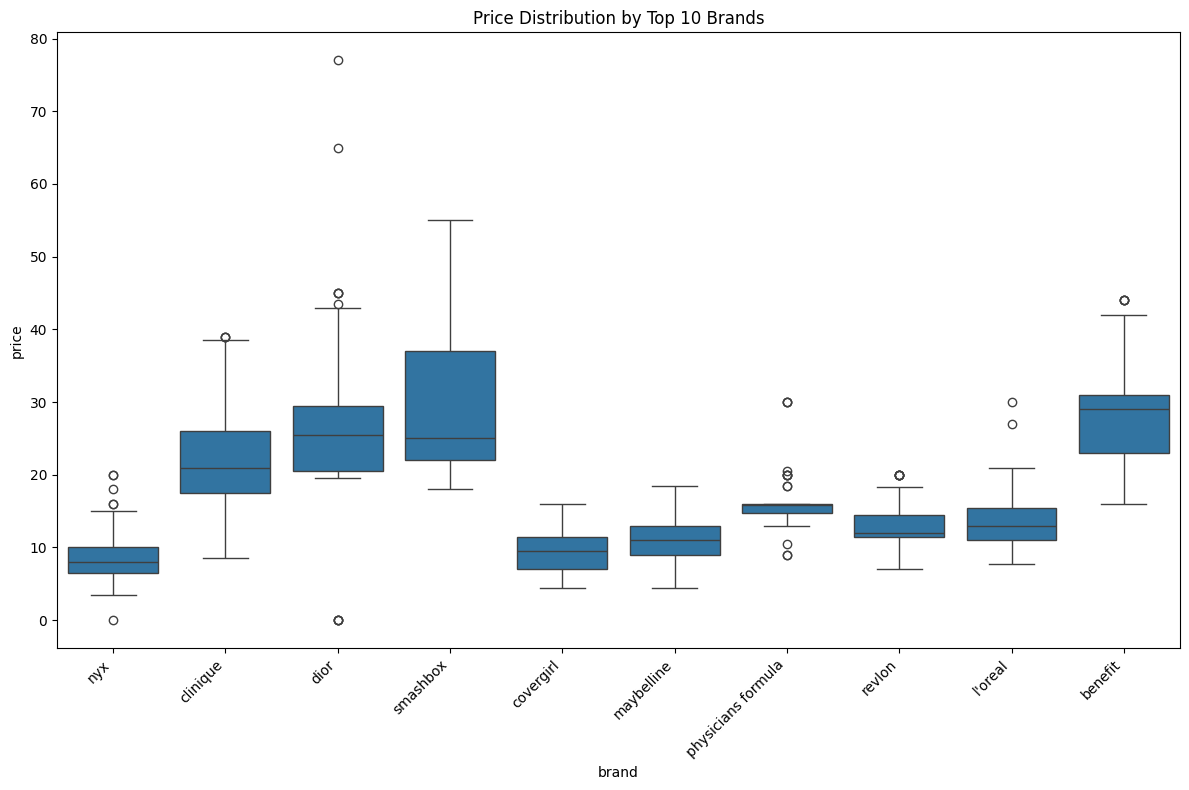

In [24]:
top_brands = df['brand'].value_counts().head(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(x='brand', y='price', data=df[df['brand'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Create our training data


In [54]:
training_data = df[["brand","name", "price", "rating", "product_type"]]

In [55]:
np.random.seed(42)


training_data['quantity_sold'] = np.random.randint(1, 11, size=len(training_data))

C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7952\542401785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['quantity_sold'] = np.random.randint(1, 11, size=len(training_data))


In [56]:
training_data["quantity_sold"].dtypes

dtype('int32')

In [57]:
missing_ratings = training_data['rating'].isna()
training_data.loc[missing_ratings, 'rating'] = np.round(np.random.uniform(1.0, 5.0, size=missing_ratings.sum()), 1)
training_data["rating"].head()
training_data['rating'].dtypes

dtype('float64')

In [58]:
training_data["rating"].head()

0    3.1
1    1.3
2    1.9
3    3.2
4    2.7
Name: rating, dtype: float64

In [59]:
training_data['recommendation'] = np.where(
    (training_data['rating'] >= 4.0) & (training_data['quantity_sold'] >= 6),
    'yes',
    'no'
)
positive_recs = training_data[training_data['recommendation'] == 'yes']
print(positive_recs.head())
print(len(positive_recs))


              brand                                              name  price  \
11              nyx                                       Stick Blush   6.00   
14         clinique                Blushing Blush&trade; Powder Blush  23.00   
30             None                     Fake Bake Blush Legal Sunburn  15.99   
37        covergirl           CoverGirl truBLEND Blush in Medium Rose  13.99   
40  cargo cosmetics  Cargo Cosmetics Swimmables Water Resistant Blush  29.00   

    rating product_type  quantity_sold recommendation  
11     4.0        blush              8            yes  
14     4.0        blush              6            yes  
30     5.0        blush              9            yes  
37     5.0        blush              7            yes  
40     5.0        blush              9            yes  
225


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_7952\462876687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['recommendation'] = np.where(


In [60]:
training_data.head(50)

,brand,name,price,rating,product_type,quantity_sold,recommendation
0,rejuva minerals,Multi Purpose Powder - Blush & Eye,0.00,3.1,blush,7,no
1,marienatie,Mineral Blush,0.00,1.3,blush,4,no
2,lotus cosmetics usa,Creme to Powder Blush,0.00,1.9,blush,8,no
3,glossier,Cloud Paint,22.00,3.2,blush,5,no
4,nyx,Sweet Cheeks Blush Palette,20.00,2.7,blush,7,no
5,nyx,Cheek Contour Duo Palette,9.00,2.3,blush,10,no
6,nyx,High Definition Blush Pro Refills,6.00,3.9,blush,3,no
7,nyx,Rouge Cream Blush,6.00,3.8,blush,7,no
8,nyx,Baked Blush,7.00,1.7,blush,8,no
9,nyx,High Definition Blush,6.50,4.5,blush,5,no


In [61]:
training_data.to_csv('augmented_training_data.csv', index=False)